<a href="https://colab.research.google.com/github/MaartenKool/notebook/blob/master/tensorflow_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow API Intro

_Author: Christoph Rahmede_

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Regression-model" data-toc-modified-id="Regression-model-1">Regression model</a></span><ul class="toc-item"><li><span><a href="#Rescaling" data-toc-modified-id="Rescaling-1.1">Rescaling</a></span></li><li><span><a href="#Scikit-Learn-fit-for-reference" data-toc-modified-id="Scikit-Learn-fit-for-reference-1.2">Scikit-Learn fit for reference</a></span></li><li><span><a href="#Linear-regression-algebraically-with-numpy" data-toc-modified-id="Linear-regression-algebraically-with-numpy-1.3">Linear regression algebraically with numpy</a></span></li><li><span><a href="#Linear-regression-algebraically-with-TensorFlow" data-toc-modified-id="Linear-regression-algebraically-with-TensorFlow-1.4">Linear regression algebraically with TensorFlow</a></span></li><li><span><a href="#Create-TensorFlow-variables" data-toc-modified-id="Create-TensorFlow-variables-1.5">Create TensorFlow variables</a></span></li><li><span><a href="#Define-the-model-parameters" data-toc-modified-id="Define-the-model-parameters-1.6">Define the model parameters</a></span></li><li><span><a href="#Loss-function" data-toc-modified-id="Loss-function-1.7">Loss function</a></span></li><li><span><a href="#Optimizer" data-toc-modified-id="Optimizer-1.8">Optimizer</a></span></li><li><span><a href="#Number-of-epochs" data-toc-modified-id="Number-of-epochs-1.9">Number of epochs</a></span></li><li><span><a href="#Training-session" data-toc-modified-id="Training-session-1.10">Training session</a></span></li><li><span><a href="#Plot-MSE-versus-Epochs" data-toc-modified-id="Plot-MSE-versus-Epochs-1.11">Plot MSE versus Epochs</a></span></li></ul></li><li><span><a href="#Code-summary-for-optimization" data-toc-modified-id="Code-summary-for-optimization-2">Code summary for optimization</a></span></li><li><span><a href="#Name-scopes" data-toc-modified-id="Name-scopes-3">Name scopes</a></span></li><li><span><a href="#Resources" data-toc-modified-id="Resources-4">Resources</a></span></li></ul></div>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [0]:
import tensorflow as tf

TensorFlow is a general purpose framework not just for neural networks, but for any large scale computations.
Similar to what we have seen in the context of pymc3, TensorFlow works with computational graphs and tensor variables. Before doing any computation, we are going to set up the architecture by defining the operations that we want to carry out. After this "construction phase" we can launch the execution phase through a TensorFlow session. We could work interactively, but the preferred way is to work within a context manager.

As a first example, let's define a very simple computation. We set up a few variables, give them a name and combine:

In [7]:
x = tf.Variable(2, name='x')
y = tf.Variable(7, name='y')
f = x*y+y**2-21

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
x

<tf.Variable 'x:0' shape=() dtype=int32_ref>

To obtain the result, we run a TensorFlow session within a context manager. Inside the context manager, we have to initialize all the variables. Then we can evaluate variables.

In [0]:
with tf.Session() as sess:
    x.initializer.run()
    y.initializer.run()
    result = f.eval()

In [10]:
print(result)

42


In general, we will have to initialize many variables. We can do that in one go as below:

In [11]:
init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    result_1 = f.eval()
    result_2 = sess.run(f)

print(result_1)
print(result_2)

42
42


The operations where defined in a computational graph to which all new variables are added.
Note that if you run the cell defining the variables repeatedly, new variables will be added to the graph.

In [12]:
x

<tf.Variable 'x:0' shape=() dtype=int32_ref>

We can refer to the computational graph.

In [0]:
g = tf.get_default_graph()

We can refer to specific variables and operations.

In [14]:
g.get_all_collection_keys()

['variables', 'trainable_variables']

In [15]:
g.get_collection('trainable_variables')

[<tf.Variable 'x:0' shape=() dtype=int32_ref>,
 <tf.Variable 'y:0' shape=() dtype=int32_ref>]

In [16]:
g.get_collection('variables')

[<tf.Variable 'x:0' shape=() dtype=int32_ref>,
 <tf.Variable 'y:0' shape=() dtype=int32_ref>]

In [17]:
g.get_operations()

[<tf.Operation 'x/initial_value' type=Const>,
 <tf.Operation 'x' type=VariableV2>,
 <tf.Operation 'x/Assign' type=Assign>,
 <tf.Operation 'x/read' type=Identity>,
 <tf.Operation 'y/initial_value' type=Const>,
 <tf.Operation 'y' type=VariableV2>,
 <tf.Operation 'y/Assign' type=Assign>,
 <tf.Operation 'y/read' type=Identity>,
 <tf.Operation 'mul' type=Mul>,
 <tf.Operation 'pow/y' type=Const>,
 <tf.Operation 'pow' type=Pow>,
 <tf.Operation 'add' type=Add>,
 <tf.Operation 'sub/y' type=Const>,
 <tf.Operation 'sub' type=Sub>,
 <tf.Operation 'init' type=NoOp>]

In [18]:
g.get_operation_by_name('pow')

<tf.Operation 'pow' type=Pow>

We can retrieve variable values at a later stage.

In [0]:
with tf.Session() as sess:
    init.run()
    x0 = sess.run(g.get_tensor_by_name('x:0'))

In [20]:
x0

2

In [22]:
!pip install tfgraphviz

  Stored in directory: /root/.cache/pip/wheels/09/32/14/5a088574d718bfeb86629b01549771914c53a06b4363576b67
Successfully built tfgraphviz


The [tensorflow graphviz](https://github.com/akimach/tfgraphviz) package imports visualization created by tensorboard.
You can install it with

`pip install tfgraphviz`

In [23]:
import tfgraphviz as tfg
g = tfg.board(tf.get_default_graph())
g.view()

'G.gv.pdf'

Since any new operations are going to be added to the same graph, it can be a good idea to reset the graph once you start with a new computation. We use this function simultaneously to set a random seed.

In [0]:
def reset_graph(seed=1):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [0]:
reset_graph()

## Regression model

TensorFlow performs typical linear algebra computations. We can make use of them to perform standard linear regression.

In [26]:
data='https://raw.githubusercontent.com/crahm/dataset-collection/master/auto-mpg/auto-mpg.csv'

df = pd.read_csv(data, sep='\s+', header=None)
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower',
              'weight', 'acceleration', 'year', 'origin', 'name']
df.drop(df[df.horsepower == '?'].index, inplace=True)
df.reset_index(inplace=True, drop=True)
df['horsepower'] = df.horsepower.astype(float)
df['brand'] = df.name.map(lambda x: x.split(' ')[0]
                          ).replace(
    {'toyouta': 'toyota',
     'maxda': 'mazda',
     'chevroelt': 'chevrolet',
     'vw': 'volkswagen',
     'vokswagen': 'volkswagen',
     'mercedes-benz': 'mercedes'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
year            392 non-null int64
origin          392 non-null int64
name            392 non-null object
brand           392 non-null object
dtypes: float64(5), int64(3), object(2)
memory usage: 30.7+ KB


In [27]:
df = pd.get_dummies(df, columns=['origin'], drop_first=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,name,brand,origin_2,origin_3
0,18.0,8,307.0,130.0,3504.0,12.0,70,chevrolet chevelle malibu,chevrolet,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,buick skylark 320,buick,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,plymouth satellite,plymouth,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,amc rebel sst,amc,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,ford torino,ford,0,0


In [0]:
target = 'mpg'
predictors = [col for col in df.columns if col not in ['mpg', 'name', 'brand']]
n_features = len(predictors)

X = df[predictors].values
y = df[[target]].values

### Rescaling

Rescaling is essential since we are going to use an iterative optimization algorithm for finding the optimal solution. Rescaling will remain crucial also in the context of neural network models.

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = X_train
X_test = X_test

### Scikit-Learn fit for reference

In [0]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)
print(model.intercept_, model.coef_)
model_mse = mean_squared_error(y_train, model.predict(X_train))
print(model_mse)

(array([23.40415335]), array([[-0.28232275,  2.28163943, -0.24164074, -6.27096283,  0.52777253,
         2.81814812,  0.98942257,  1.09814638]]))
10.490330742374384


### Linear regression algebraically with numpy

We use the algebraic solution for the beta coefficients.
$$
\beta = \left(X^T X\right)^{-1}X^T y
$$

We have to add the intercept term to the data matrix.

In [0]:
X_tr = np.concatenate([np.ones(len(X_train)).reshape(-1, 1), X_train], axis=1)

In [33]:
print(np.dot(np.dot(np.linalg.inv(np.dot(X_tr.T, X_tr)), X_tr.T), y_train))

[[23.40415335]
 [-0.28232275]
 [ 2.28163943]
 [-0.24164074]
 [-6.27096283]
 [ 0.52777253]
 [ 2.81814812]
 [ 0.98942257]
 [ 1.09814638]]


### Linear regression algebraically with TensorFlow

Since TensorFlow sets up the computational graph before a session is run, algebraic operations should not be defined in the eager numpy way. Analogous operations exist in TensorFlow.

In [34]:
X = tf.constant(X_tr, dtype=tf.float64, name='X')
y = tf.constant(y_train, dtype=tf.float64, name='y')
X_T = tf.transpose(X)
beta = tf.matmul(tf.matmul(
    tf.matrix_inverse(tf.matmul(X_T, X)), X_T), y)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    init.run()
    beta_value = sess.run(beta)

print(beta_value)

[[23.40415335]
 [-0.28232275]
 [ 2.28163943]
 [-0.24164074]
 [-6.27096283]
 [ 0.52777253]
 [ 2.81814812]
 [ 0.98942257]
 [ 1.09814638]]


### Create TensorFlow variables

We create TensorFlow variables which we will populate with data during training. We only fix the number of columns, but leave the number of rows undefined. This will facilitate working with training and test sets.

In [0]:
X = tf.placeholder(tf.float32, shape=(None, n_features), name='X')
y = tf.placeholder(tf.float32, shape=(None, 1), name='y')

### Define the model parameters

- $b$: intercept
- $w$: model coefficients

In [0]:
w = tf.Variable(tf.zeros([n_features, 1]))
b = tf.Variable(tf.zeros([1]))

### Loss function

We use the mean squared error.

In [0]:
predictions = tf.add(tf.matmul(X, w), b)
loss = tf.losses.mean_squared_error(y, predictions)

### Optimizer

We will use gradient descent for optimization which requires a learning rate as a parameter. Other methods are [available](https://www.tensorflow.org/api_docs/python/tf/train).

In [0]:
learning_rate = 0.1
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss)

### Number of epochs

Epochs are the iteration steps for the gradient descent when the entire training data has been looked at.

In [0]:
training_epochs = 1000

### Training session

- We start the session by initializing the variables.
- If we evaluate quantities which need to be fed with placeholder data, we use a dictionary for feeding inside the data.
- Session run results assigned to a variable can be referred to later.

In [0]:
loss_history = []
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        sess.run(training_operation, feed_dict={X: X_train, y: y_train})
        loss_history.append(sess.run(loss, feed_dict={X: X_train, y: y_train}))

    loss_final, w_final, b_final, predictions_y = sess.run(
        [loss, w, b, predictions],
        feed_dict={X: X_train, y: y_train})

In [44]:
loss_final

10.490334

In [45]:
mean_squared_error(y_train, predictions_y)

10.490334647684612

In [46]:
b_final

array([23.40415], dtype=float32)

In [47]:
w_final

array([[-0.27804324],
       [ 2.2727203 ],
       [-0.24156162],
       [-6.26728   ],
       [ 0.52704805],
       [ 2.817764  ],
       [ 0.9886561 ],
       [ 1.0975658 ]], dtype=float32)

In [48]:
model.coef_

array([[-0.28232275,  2.28163943, -0.24164074, -6.27096283,  0.52777253,
         2.81814812,  0.98942257,  1.09814638]])

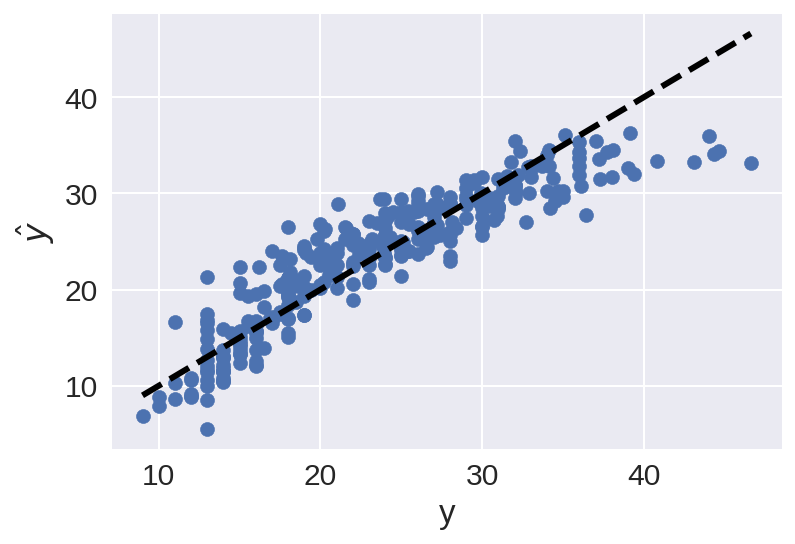

In [49]:
fig, ax = plt.subplots()
ax.scatter(y_train, predictions_y)
ax.plot([y_train.min(), y_train.max()], [
        y_train.min(), y_train.max()], 'k--', lw=3)
ax.set_xlabel('y')
ax.set_ylabel(r'$\hat{y}$')
plt.show()

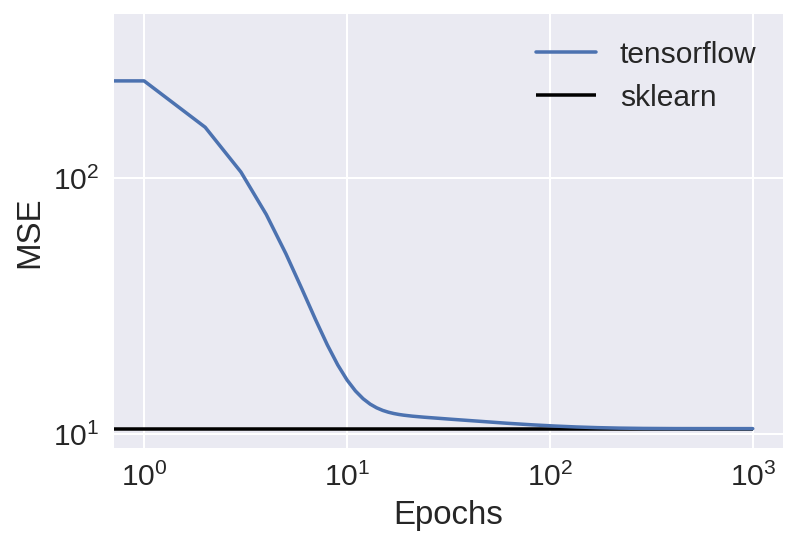

In [50]:
plt.plot(list(range(training_epochs)), loss_history, label='tensorflow')
plt.hlines(model_mse, 0, training_epochs, label='sklearn')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

A scikit-learn comparable score is achieved fast, but obtaining close coefficients takes more iterations. Usually it is good practice to display intermediate results.

In [0]:
training_epochs = 1000
display_step = 100

In [52]:
loss_history = []
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        sess.run(training_operation, feed_dict={X: X_train, y: y_train})
        loss_current = sess.run(loss, feed_dict={X: X_train, y: y_train})
        loss_history.append(loss_current)

        if (epoch+1) % display_step == 0:
            b_current, w_current = sess.run([b, w])
            print('Epoch: {}'.format(epoch+1),
                  'loss:{:.2}'.format(loss_current))
            print('Intercept: {:.3}'.format(b_current[0]),
                  'Coefficients: {}'.format(np.around(w_current.T, 2)))

    print('\n\nOptimization finished\n\n')
    loss_final, w_final, b_final, predictions_y = sess.run(
        [loss, w, b, predictions],
        feed_dict={X: X_train, y: y_train})

    print('Final loss:\t\t {:.4}'.format(loss_final))
    print('Intercept:\t\t {:.3}'.format(b_final[0]))

    for x in zip(predictors, w_final):
        print(x[0], ':\t\t', round(x[1][0], 3))

('Epoch: 100', 'loss:1.1e+01')
('Intercept: 23.4', 'Coefficients: [[ 0.15  0.36 -0.9  -4.51  0.09  2.64  0.81  1.04]]')
('Epoch: 200', 'loss:1.1e+01')
('Intercept: 23.4', 'Coefficients: [[ 0.1   1.22 -0.48 -5.52  0.34  2.74  0.9   1.05]]')
('Epoch: 300', 'loss:1.1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.04  1.69 -0.32 -5.92  0.45  2.78  0.94  1.07]]')
('Epoch: 400', 'loss:1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.14  1.95 -0.27 -6.1   0.49  2.8   0.96  1.08]]')
('Epoch: 500', 'loss:1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.2   2.1  -0.25 -6.19  0.51  2.81  0.97  1.09]]')
('Epoch: 600', 'loss:1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.24  2.18 -0.24 -6.23  0.52  2.81  0.98  1.09]]')
('Epoch: 700', 'loss:1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.26  2.23 -0.24 -6.25  0.52  2.82  0.98  1.09]]')
('Epoch: 800', 'loss:1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.27  2.25 -0.24 -6.26  0.53  2.82  0.99  1.1 ]]')
('Epoch: 900', 'loss:1e+01')
('Intercept: 23.4', '

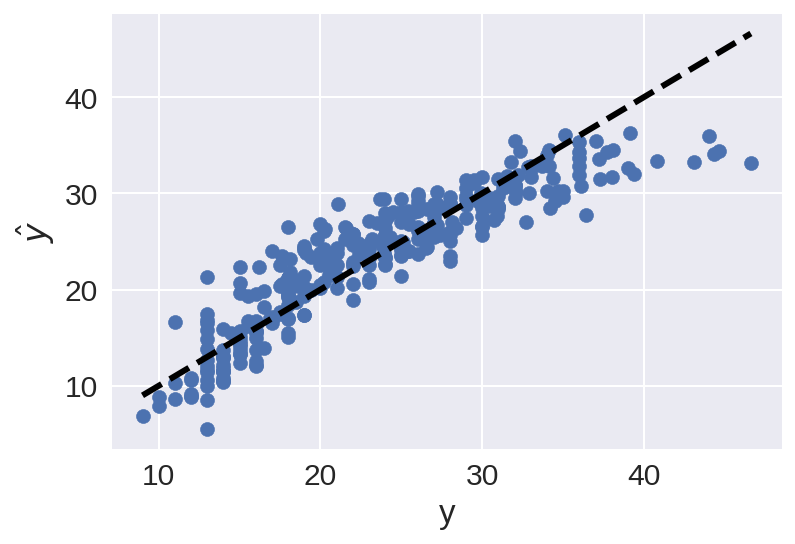

In [53]:
fig, ax = plt.subplots()
ax.scatter(y_train, predictions_y)
ax.plot([y_train.min(), y_train.max()], [
        y_train.min(), y_train.max()], 'k--', lw=3)
ax.set_xlabel('y')
ax.set_ylabel(r'$\hat{y}$')
plt.show()

### Plot MSE versus Epochs

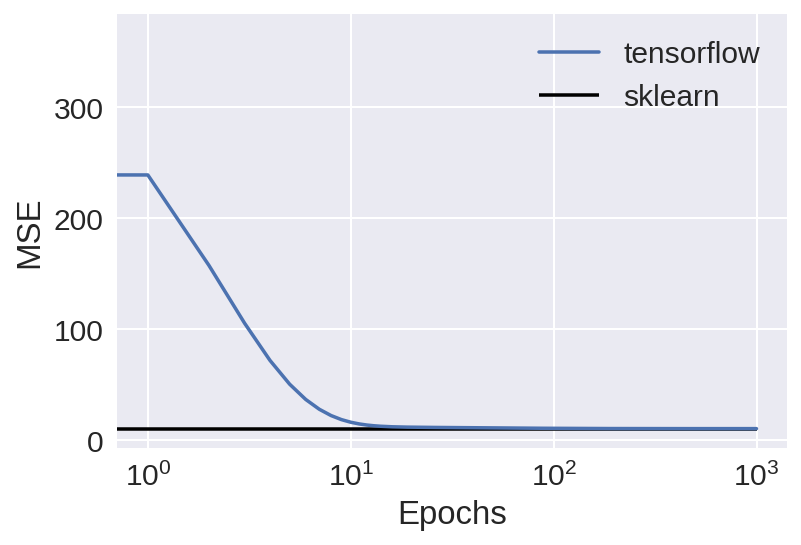

In [54]:
plt.plot(list(range(training_epochs)), loss_history, label='tensorflow')
plt.hlines(model_mse, 0, training_epochs, label='sklearn')
plt.xscale('log')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

## Code summary for optimization

We add also mini-batch processing. During each epoch the data is split randomly into pieces, after looking at each mini-batch a coefficient update is performed. 

In [0]:
def batch_iterator(X, y, batch_size):
    random_index = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_index in np.array_split(random_index, n_batches):
        X_batch, y_batch = X[batch_index], y[batch_index]
        yield X_batch, y_batch

In [56]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_features), name='X')
y = tf.placeholder(tf.float32, shape=(None, 1), name='y')

w = tf.Variable(tf.zeros([n_features, 1]))
b = tf.Variable(tf.zeros([1]))

predictions = tf.add(tf.matmul(X, w), b)
loss = tf.losses.mean_squared_error(y, predictions)

learning_rate = 0.1
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_operation = optimizer.minimize(loss)

training_epochs = 1000  # Number of iteration steps
display_step = 100  # Display intermediate results
batch_size = 50

loss_history = []
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        loss_current = sess.run(loss, feed_dict={X: X_train, y: y_train})
        loss_history.append(loss_current)

        if (epoch+1) % display_step == 0:
            b_current, w_current = sess.run([b, w])
            print('Epoch: {}'.format(epoch+1),
                  'loss:{:.2}'.format(loss_current))
            print('Intercept: {:.3}'.format(b_current[0]),
                  'Coefficients: {}'.format(np.around(w_current.T, 2)))

        for X_batch, y_batch in batch_iterator(X_train, y_train, batch_size):
            sess.run(training_operation, feed_dict={X: X_batch, y: y_batch})

    print('\n\nOptimization finished\n\n')
    loss_final, w_final, b_final, predictions_y = sess.run(
        [loss, w, b, predictions],
        feed_dict={X: X_train, y: y_train})

    print('Final loss:\t\t {:.4}'.format(loss_final))
    print('Intercept:\t\t {:.3}'.format(b_final[0]))

    for x in zip(predictors, w_final):
        print(x[0], ':\t\t', round(x[1][0], 3))

('Epoch: 100', 'loss:1.1e+01')
('Intercept: 23.5', 'Coefficients: [[-0.29  2.15 -0.33 -6.33  0.58  2.84  0.94  1.18]]')
('Epoch: 200', 'loss:1.1e+01')
('Intercept: 23.5', 'Coefficients: [[-0.39  2.23 -0.33 -6.36  0.63  2.88  1.02  1.13]]')
('Epoch: 300', 'loss:1.1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.39  2.18 -0.31 -6.35  0.63  2.83  1.09  1.12]]')
('Epoch: 400', 'loss:1.1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.27  2.35 -0.18 -6.29  0.44  2.82  0.92  1.14]]')
('Epoch: 500', 'loss:1.1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.24  2.33 -0.23 -6.22  0.58  2.86  1.    1.01]]')
('Epoch: 600', 'loss:1.1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.28  2.32 -0.17 -6.27  0.45  2.86  1.01  1.09]]')
('Epoch: 700', 'loss:1.1e+01')
('Intercept: 23.5', 'Coefficients: [[-0.37  2.19 -0.37 -6.35  0.65  2.89  0.95  1.15]]')
('Epoch: 800', 'loss:1.1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.44  2.13 -0.4  -6.44  0.66  2.98  1.06  1.15]]')
('Epoch: 900', 'loss:1.1e+01')
('Interce

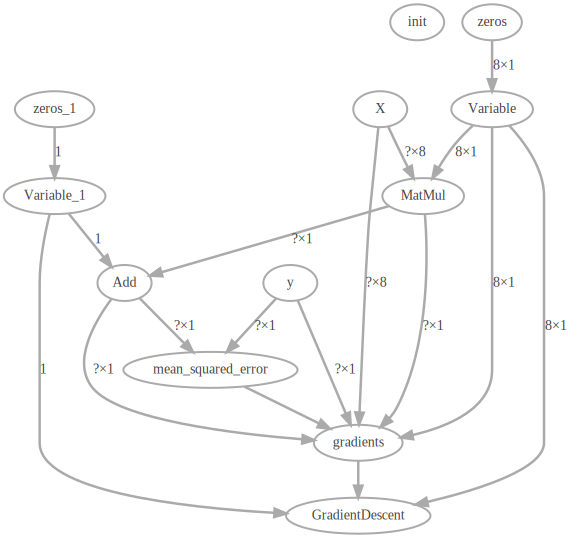

In [57]:
import tfgraphviz as tfg

g = tfg.board(tf.get_default_graph())
g

## Name scopes

The computational graph becomes quite messy with lots of operations. Therefore it can be good to group operations using name scopes.

In [58]:
reset_graph()

with tf.name_scope("Variables") as scope:

    X = tf.placeholder(tf.float32, shape=(None, n_features), name='X')
    y = tf.placeholder(tf.float32, shape=(None, 1), name='y')

    w = tf.Variable(tf.zeros([n_features, 1]))
    b = tf.Variable(tf.zeros([1]))

with tf.name_scope("loss") as scope:
    predictions = tf.add(tf.matmul(X, w), b)
    loss = tf.losses.mean_squared_error(y, predictions)

with tf.name_scope("optimization") as scope:
    learning_rate = 0.1
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    training_operation = optimizer.minimize(loss)

training_epochs = 1000  # Number of iteration steps
display_step = 100  # Display intermediate results
batch_size = 50

loss_history = []
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        loss_current = sess.run(loss, feed_dict={X: X_train, y: y_train})
        loss_history.append(loss_current)

        if (epoch+1) % display_step == 0:
            b_current, w_current = sess.run([b, w])
            print('Epoch: {}'.format(epoch+1),
                  'loss:{:.2}'.format(loss_current))
            print('Intercept: {:.3}'.format(b_current[0]),
                  'Coefficients: {}'.format(np.around(w_current.T, 2)))

        for X_batch, y_batch in batch_iterator(X_train, y_train, batch_size):
            sess.run(training_operation, feed_dict={X: X_batch, y: y_batch})

    print('\n\nOptimization finished\n\n')
    loss_final, w_final, b_final, predictions_y = sess.run(
        [loss, w, b, predictions],
        feed_dict={X: X_train, y: y_train})

    print('Final loss:\t\t {:.4}'.format(loss_final))
    print('Intercept:\t\t {:.3}'.format(b_final[0]))

    for x in zip(predictors, w_final):
        print(x[0], ':\t\t', round(x[1][0], 3))

('Epoch: 100', 'loss:1.1e+01')
('Intercept: 23.5', 'Coefficients: [[-0.29  2.15 -0.33 -6.33  0.58  2.84  0.94  1.18]]')
('Epoch: 200', 'loss:1.1e+01')
('Intercept: 23.5', 'Coefficients: [[-0.39  2.23 -0.33 -6.36  0.63  2.88  1.02  1.13]]')
('Epoch: 300', 'loss:1.1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.39  2.18 -0.31 -6.35  0.63  2.83  1.09  1.12]]')
('Epoch: 400', 'loss:1.1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.27  2.35 -0.18 -6.29  0.44  2.82  0.92  1.14]]')
('Epoch: 500', 'loss:1.1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.24  2.33 -0.23 -6.22  0.58  2.86  1.    1.01]]')
('Epoch: 600', 'loss:1.1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.28  2.32 -0.17 -6.27  0.45  2.86  1.01  1.09]]')
('Epoch: 700', 'loss:1.1e+01')
('Intercept: 23.5', 'Coefficients: [[-0.37  2.19 -0.37 -6.35  0.65  2.89  0.95  1.15]]')
('Epoch: 800', 'loss:1.1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.44  2.13 -0.4  -6.44  0.66  2.98  1.06  1.15]]')
('Epoch: 900', 'loss:1.1e+01')
('Interce

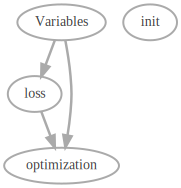

In [59]:
g = tfg.board(tf.get_default_graph(), depth=1)
g

In [60]:
reset_graph()

with tf.name_scope("Variables") as scope:

    X = tf.placeholder(tf.float32, shape=(None, n_features), name='X')
    y = tf.placeholder(tf.float32, shape=(None, 1), name='y')

    w = tf.Variable(tf.zeros([n_features, 1]))
    b = tf.Variable(tf.zeros([1]))

with tf.name_scope("loss") as scope:
    predictions = tf.add(tf.matmul(X, w), b)
    loss = tf.losses.mean_squared_error(y, predictions)

with tf.name_scope("optimization") as scope:
    learning_rate = 0.1
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    training_operation = optimizer.minimize(loss)

training_epochs = 1000  # Number of iteration steps
display_step = 100  # Display intermediate results
batch_size = 50

loss_history = []
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        loss_current = sess.run(loss, feed_dict={X: X_train, y: y_train})
        loss_history.append(loss_current)

        if (epoch+1) % display_step == 0:
            b_current, w_current = sess.run([b, w])
            print('Epoch: {}'.format(epoch+1),
                  'loss:{:.2}'.format(loss_current))
            print('Intercept: {:.3}'.format(b_current[0]),
                  'Coefficients: {}'.format(np.around(w_current.T, 2)))

        for X_batch, y_batch in batch_iterator(X_train, y_train, batch_size):
            sess.run(training_operation, feed_dict={X: X_batch, y: y_batch})

    print('\n\nOptimization finished\n\n')
    loss_final, w_final, b_final, predictions_y = sess.run(
        [loss, w, b, predictions],
        feed_dict={X: X_test, y: y_test})

    print('Final loss:\t\t {:.4}'.format(loss_final))
    print('Intercept:\t\t {:.3}'.format(b_final[0]))

    for x in zip(predictors, w_final):
        print(x[0], ':\t\t', round(x[1][0], 3))

('Epoch: 100', 'loss:1.1e+01')
('Intercept: 23.5', 'Coefficients: [[-0.29  2.15 -0.33 -6.33  0.58  2.84  0.94  1.18]]')
('Epoch: 200', 'loss:1.1e+01')
('Intercept: 23.5', 'Coefficients: [[-0.39  2.23 -0.33 -6.36  0.63  2.88  1.02  1.13]]')
('Epoch: 300', 'loss:1.1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.39  2.18 -0.31 -6.35  0.63  2.83  1.09  1.12]]')
('Epoch: 400', 'loss:1.1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.27  2.35 -0.18 -6.29  0.44  2.82  0.92  1.14]]')
('Epoch: 500', 'loss:1.1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.24  2.33 -0.23 -6.22  0.58  2.86  1.    1.01]]')
('Epoch: 600', 'loss:1.1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.28  2.32 -0.17 -6.27  0.45  2.86  1.01  1.09]]')
('Epoch: 700', 'loss:1.1e+01')
('Intercept: 23.5', 'Coefficients: [[-0.37  2.19 -0.37 -6.35  0.65  2.89  0.95  1.15]]')
('Epoch: 800', 'loss:1.1e+01')
('Intercept: 23.4', 'Coefficients: [[-0.44  2.13 -0.4  -6.44  0.66  2.98  1.06  1.15]]')
('Epoch: 900', 'loss:1.1e+01')
('Interce

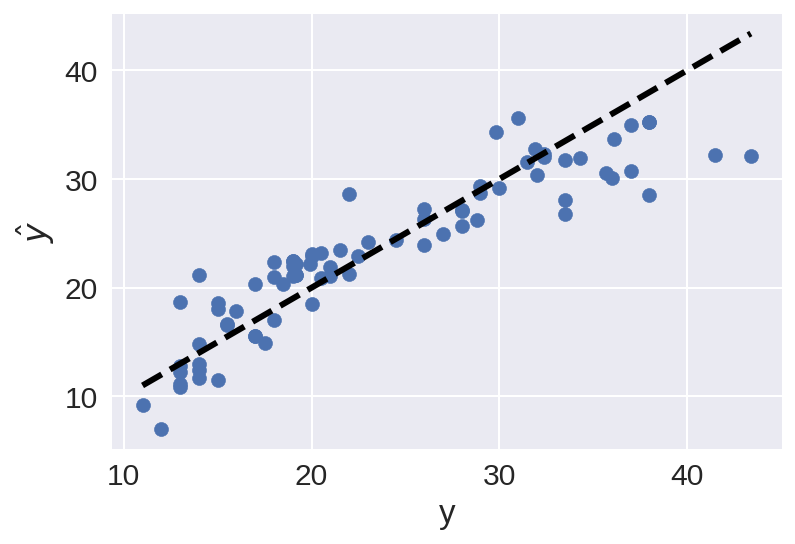

In [61]:
fig, ax = plt.subplots()
ax.scatter(y_test, predictions_y)
ax.plot([y_test.min(), y_test.max()], [
        y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('y')
ax.set_ylabel(r'$\hat{y}$')
plt.show()

## Resources

An excellent introduction to TensorFlow and neural networks can be found at https://github.com/ageron/handson-ml, the related book reference is

A. Geron: Hands-on Machine Learning with Scikit-Learn and TensorFlow, O'Reilly, 2017

Chapters 9, 10 and 11 inspired a lot of the material found in this course.